# Evaluating the Hybrid Model

## Import Prerequite Data

In [1]:
import numpy as np
baseline_y_pred = np.load("Results/model_4_hybrid_baseline_predictions.npy")
baseline_y_true = np.load("Results/model_4_hybrid_baseline_true_labels.npy")
distilbert_y_pred = np.load("Results/model_4_hybrid_distilBERT_predictions.npy")
distilbert_y_true = np.load("Results/model_4_hybrid_distilBERT_true_labels.npy")
print(f"Shape of baseline_y_pred: {baseline_y_pred.shape}")
print(f"Shape of baseline_y_true: {baseline_y_true.shape}")
print(f"Shape of distilbert_y_pred: {distilbert_y_pred.shape}")
print(f"Shape of distilbert_y_true: {distilbert_y_true.shape}")

Shape of baseline_y_pred: (100,)
Shape of baseline_y_true: (100,)
Shape of distilbert_y_pred: (1611,)
Shape of distilbert_y_true: (1611,)


## Import Prerequisite Libraries

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Evaluating the Prediction Outcomes from Baseline data

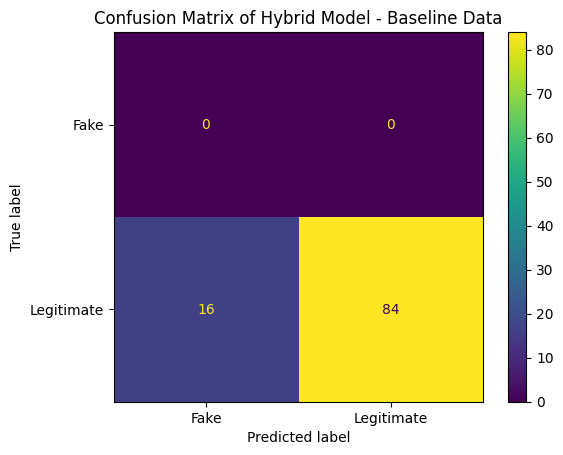

In [3]:
# Confusion matrix for Baseline
ConfusionMatrixDisplay.from_predictions(
    y_true=baseline_y_true,
    y_pred=baseline_y_pred, cmap='viridis',
    display_labels=['Fake','Legitimate'],
    values_format='d'
)
plt.title('Confusion Matrix of Hybrid Model - Baseline Data')
plt.savefig('Results/model_4_hybrid_baseline_confusion_matrix.png')
plt.show()

In [4]:
# Calculate metrics for baseline model
baseline_accuracy = accuracy_score(baseline_y_true, baseline_y_pred)
baseline_macro_f1 = f1_score(baseline_y_true, baseline_y_pred, average='macro')
baseline_micro_f1 = f1_score(baseline_y_true, baseline_y_pred, average='micro')
baseline_precision = precision_score(baseline_y_true, baseline_y_pred, average='weighted')
baseline_recall = recall_score(baseline_y_true, baseline_y_pred, average='weighted')

# Calculate FPR and TPR for AUC
fpr, tpr, _ = roc_curve(baseline_y_true, baseline_y_pred)
baseline_auc = auc(fpr, tpr) if not np.isnan(fpr).any() and not np.isnan(tpr).any() else 0.0

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Macro-F1 Score: {baseline_macro_f1:.4f}")
print(f"Baseline Micro-F1 Score: {baseline_micro_f1:.4f}")
print(f"Baseline Precision: {baseline_precision:.4f}")
print(f"Baseline Recall: {baseline_recall:.4f}")
print(f"Baseline AUC: {baseline_auc:.4f}")

Baseline Accuracy: 0.8400
Baseline Macro-F1 Score: 0.4565
Baseline Micro-F1 Score: 0.8400
Baseline Precision: 1.0000
Baseline Recall: 0.8400
Baseline AUC: 0.0000


c:\Data\Canada\Study\masters\CSI 5386 - Natural Language Processing\Natural-Language-Processing\project-venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Data\Canada\Study\masters\CSI 5386 - Natural Language Processing\Natural-Language-Processing\project-venv\lib\site-packages\sklearn\metrics\_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


The ground truths for the baseline method has not beeen resampled. Given the class imbalance issue in the original validation set, where only 1 class exists, the AUC is calculated 0.0. As a result, it is not possible to plot a ROC-AUC curve. 

## Evaluating the Prediction Outcomes from DistilBERT data

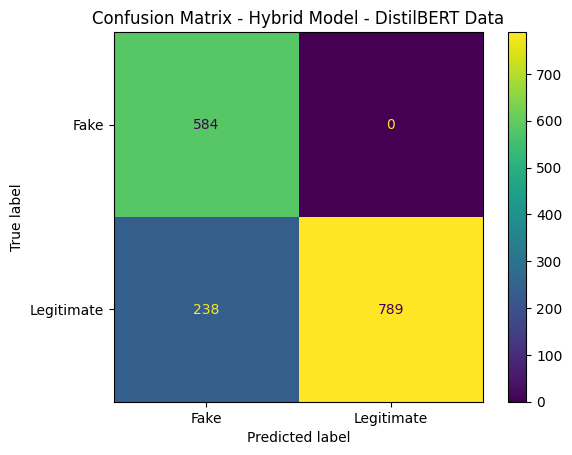

In [5]:
# Confusion matrix for Baseline
ConfusionMatrixDisplay.from_predictions(
    y_true=distilbert_y_true,
    y_pred=distilbert_y_pred, cmap='viridis',
    display_labels=['Fake','Legitimate'],
    values_format='d'
)
plt.title('Confusion Matrix - Hybrid Model - DistilBERT Data')
plt.savefig('Results/model_4_hybrid_distilbert_confusion_matrix.png')
plt.show()

In [6]:
# Calculate metrics for baseline model
distilbert_accuracy = accuracy_score(distilbert_y_true, distilbert_y_pred)
distilbert_macrof1 = f1_score(distilbert_y_true, distilbert_y_pred, average='macro')
distilbert_microf1 = f1_score(distilbert_y_true, distilbert_y_pred, average='micro')
distilbert_precision = precision_score(distilbert_y_true, distilbert_y_pred, average='weighted')
distilbert_recall = recall_score(distilbert_y_true, distilbert_y_pred, average='weighted')

# Calculate FPR and TPR for AUC
fpr, tpr, _ = roc_curve(distilbert_y_true, distilbert_y_pred)
distilbert_auc = auc(fpr, tpr) if not np.isnan(fpr).any() and not np.isnan(tpr).any() else 0.0

print(f"DistilBERT Accuracy: {distilbert_accuracy:.4f}")
print(f"DistilBERT Macro-F1 Score: {distilbert_macrof1:.4f}")
print(f"DistilBERT Micro-F1 Score: {distilbert_microf1:.4f}")
print(f"DistilBERT Precision: {distilbert_precision:.4f}")
print(f"DistilBERT Recall: {distilbert_recall:.4f}")
print(f"DistilBERT AUC: {distilbert_auc:.4f}")

DistilBERT Accuracy: 0.8523
DistilBERT Macro-F1 Score: 0.8498
DistilBERT Micro-F1 Score: 0.8523
DistilBERT Precision: 0.8950
DistilBERT Recall: 0.8523
DistilBERT AUC: 0.8841


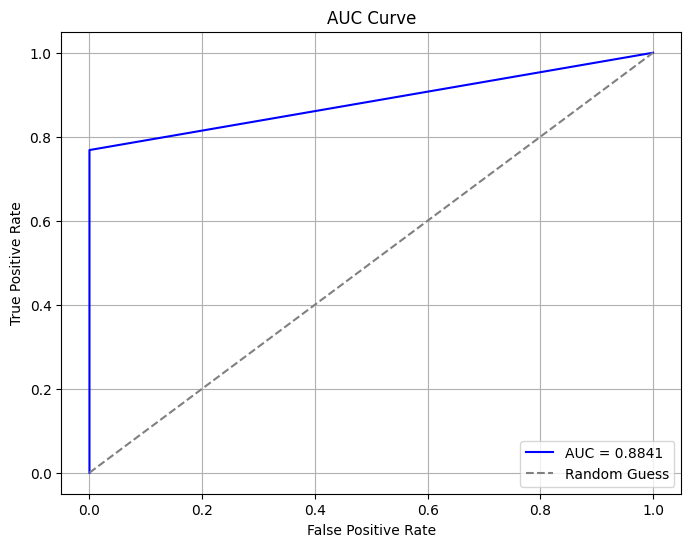

In [7]:
# Plot AUC curve for DistilBERT
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, _ = roc_curve(distilbert_y_true, distilbert_y_pred)

# Plot the AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {distilbert_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('Results/model_4_hybrid_distilbert_auc_curve.png')
plt.show()

## Conclusions

In [8]:
print(f"Average Accuracy: {(baseline_accuracy + distilbert_accuracy) / 2:.4f}")
print(f"Average Macro-F1 Score: {(baseline_macro_f1 + distilbert_macrof1) / 2:.4f}")
print(f"Average Micro-F1 Score: {(baseline_micro_f1 + distilbert_microf1) / 2:.4f}")
print(f"Average Precision: {(baseline_precision + distilbert_precision) / 2:.4f}")
print(f"Average Recall: {(baseline_recall + distilbert_recall) / 2:.4f}")
print(f"Average AUC: {(baseline_auc + distilbert_auc) / 2:.4f}")

Average Accuracy: 0.8461
Average Macro-F1 Score: 0.6532
Average Micro-F1 Score: 0.8461
Average Precision: 0.9475
Average Recall: 0.8461
Average AUC: 0.4421
